In [42]:
# Importation des modules et du dataset

In [43]:
import pandas as pd
from skimpy import skim
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import scipy.stats as stats
import pingouin as pg


In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/MaskiVal/DataSets/main/diabetes.csv')

# Analyse exploratoire, traitements, modélisation des données

## 1 - Exploration des données

#### 1.1.1 - Nombre de données, visualisation des colonnes du dataset

In [45]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   120.9 │  31.97 │     0 │     99 │    117 │  140.2 │  199 │   ▅▇▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   69.11 │  19.36 │     0 │     62 │     72 │     80 │  122 │ ▁ ▂▇▃  │  │
│ │ SkinThickness          │   0 │     0 │   20.54 │  15.95 │     0 │      0 │     23 │     32 │   99 │  ▇▇▅   │  │
│ │ Insulin                │   0 │     0 │    79.8 │  115.2 │     0 │      0 │   30.5 │  127.2 │  846 │   ▇▂   │  │
│ │ BMI                    │   0 │     0 │   31.99 │  7.884 │     0 │   27.3 │     32 │   36.6 │ 67.1 │  ▁▇▆▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [46]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### 1.1.2 - Observation des types de données

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 1.1.3 - Observation des valeurs Null

In [49]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 1.2 - Observation des variables numériques

In [77]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [50]:
data[data.duplicated(keep=False)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [51]:
rows_with_zeros = data[(data == 0).any(axis=1)]

pd.DataFrame(rows_with_zeros)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [52]:
zero_counts = data.apply(lambda col: (col == 0).sum())
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [53]:
data_outcome_0 = data[data['Outcome'] == 0]
data_outcome_1 = data[data['Outcome'] == 1]

In [54]:
data_outcome_0[data_outcome_0['Insulin'] != 0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.0
mean,2.704545,111.034091,68.969697,27.208333,130.287879,31.615152,0.476280,28.291667,0.0
std,2.615364,25.491868,11.855556,10.407211,102.482237,7.049650,0.308198,8.977484,0.0
min,0.000000,0.000000,24.000000,7.000000,15.000000,0.000000,0.085000,21.000000,0.0
25%,1.000000,94.000000,60.000000,18.750000,66.000000,26.075000,0.261000,22.000000,0.0
50%,2.000000,107.500000,70.000000,27.000000,102.500000,31.200000,0.413500,25.000000,0.0
75%,4.000000,126.000000,76.000000,34.000000,161.250000,36.100000,0.626750,30.000000,0.0
max,13.000000,197.000000,106.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [55]:
data_outcome_0['Insulin'].describe()

count    500.000000
mean      68.792000
std       98.865289
min        0.000000
25%        0.000000
50%       39.000000
75%      105.000000
max      744.000000
Name: Insulin, dtype: float64

In [56]:
zero_counts_outcome_0 = data_outcome_0.apply(lambda col: (col == 0).sum())
print(zero_counts_outcome_0)

Pregnancies                  73
Glucose                       3
BloodPressure                19
SkinThickness               139
Insulin                     236
BMI                           9
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [57]:
data_outcome_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [58]:
zero_counts_outcome_1 = data_outcome_1.apply(lambda col: (col == 0).sum())
print(zero_counts_outcome_1)

Pregnancies                  38
Glucose                       2
BloodPressure                16
SkinThickness                88
Insulin                     138
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [59]:
data_outcome_1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [76]:
# Vérification si une ligne a plusieurs zéros
has_multiple_zeros = (data_outcome_1 == 0).sum(axis=1) > 3

# Affichage des lignes qui ont plusieurs zéros
rows_with_multiple_zeros = data_outcome_1[has_multiple_zeros]

data_row_zero_out_1 = pd.DataFrame(rows_with_multiple_zeros)
data_row_zero_out_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
78,0,131,0,0,0,43.2,0.270,26,1
266,0,138,0,0,0,36.3,0.933,25,1
300,0,167,0,0,0,32.3,0.839,30,1
435,0,141,0,0,0,42.4,0.205,29,1
484,0,145,0,0,0,44.2,0.630,31,1
619,0,119,0,0,0,32.4,0.141,24,1
706,10,115,0,0,0,0.0,0.261,30,1


#### 1.2.1 - Analyse de la distribution

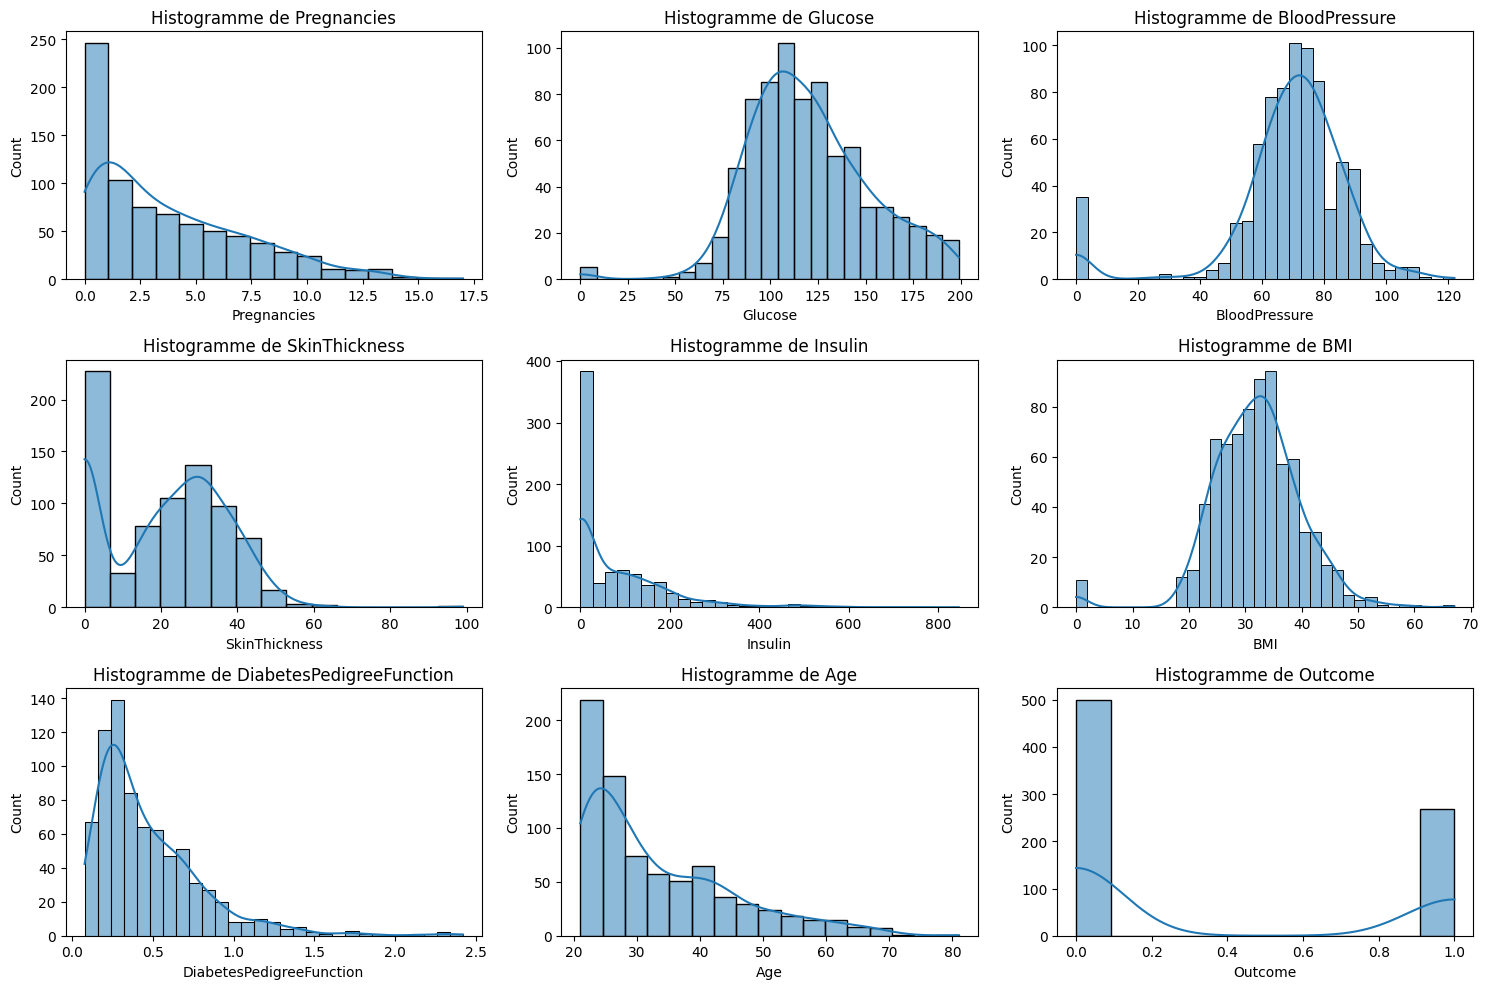

In [61]:
# Créer une figure et des sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque colonne et tracer l'histogramme correspondant
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Histogramme de {col}')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

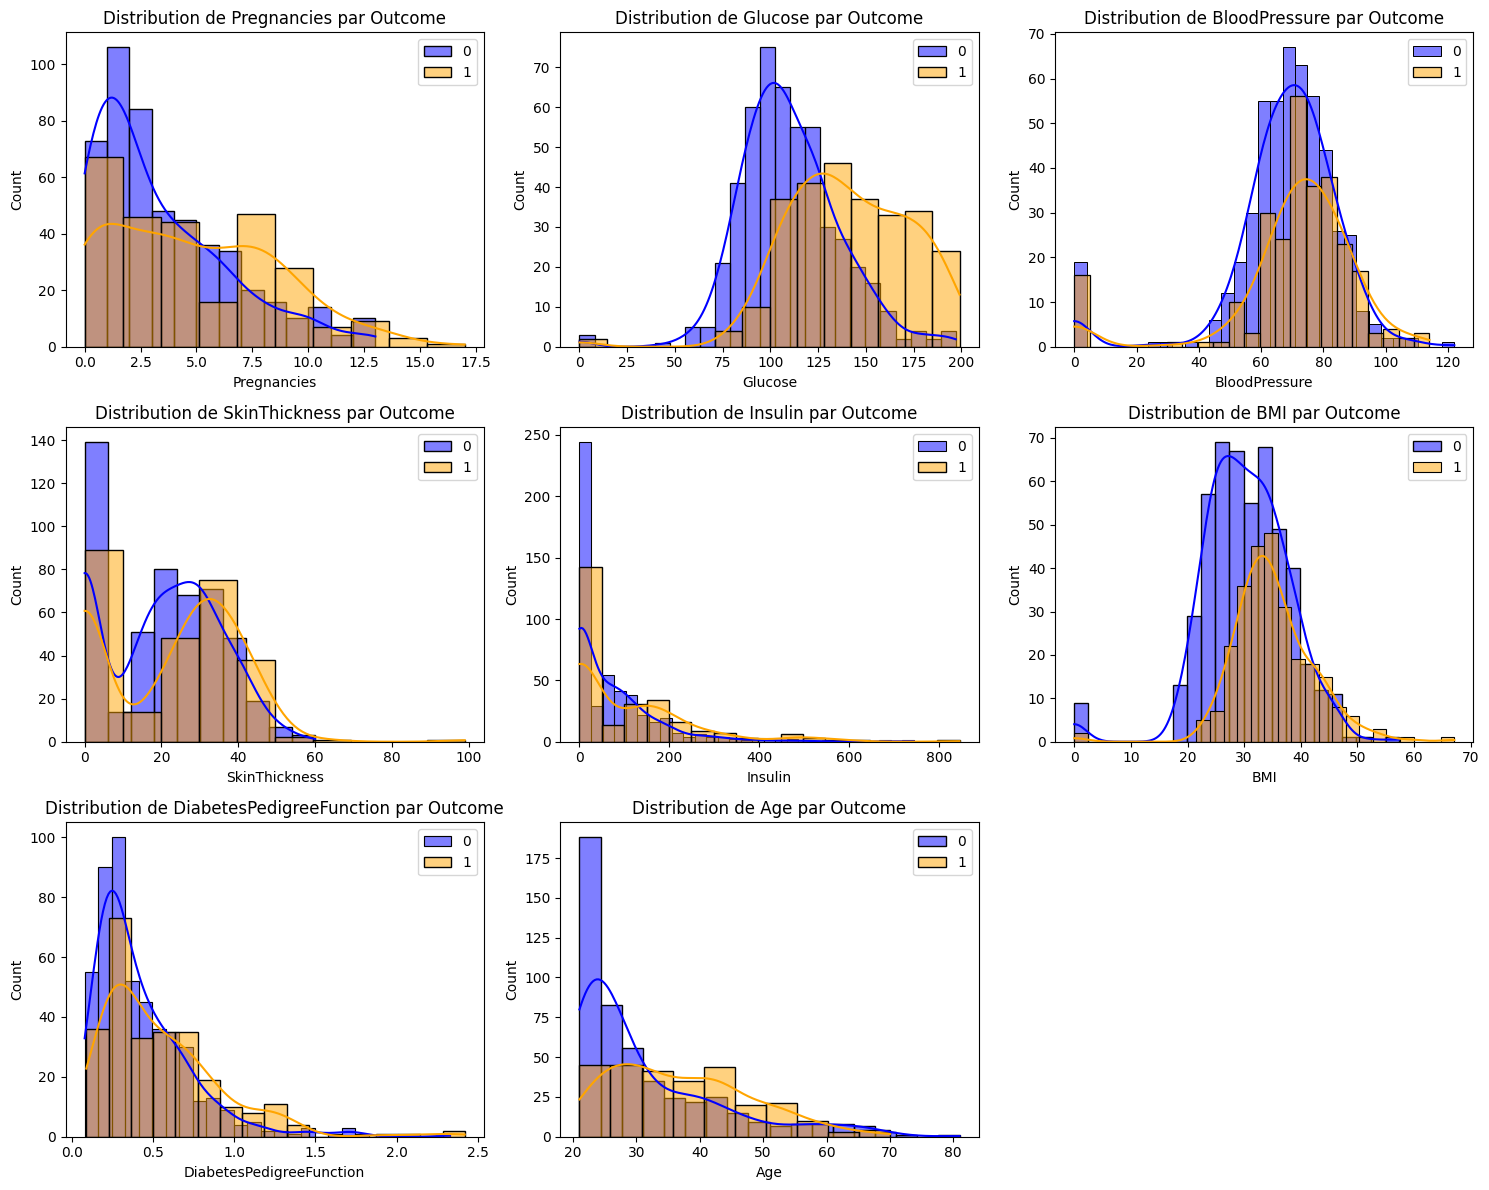

In [62]:
# Liste des caractéristiques à tracer
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Créer des sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque caractéristique et tracer les distributions
for i, feature in enumerate(features):
    sns.histplot(data[data['Outcome'] == 0][feature], color='blue', kde=True, ax=axs[i], label='0')
    sns.histplot(data[data['Outcome'] == 1][feature], color='orange', kde=True, ax=axs[i], label='1')
    '''plt.axvline(x=data[data['Outcome'] == 0][feature].median(), color='blue', linestyle='--', label='Mean for 0')
    plt.axvline(x=data[data['Outcome'] == 1][feature].median(), color='orange', linestyle='--', label='Mean for 1')'''
    axs[i].set_title(f'Distribution de {feature} par Outcome')
    axs[i].legend()

# Masquer les sous-graphiques inutilisés
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

In [ ]:
''' a completer BMI BloodPressure Glucose'''

In [ ]:
''' Analyse si pregnancies = 0 ou > 0 selon outcome toujours'''

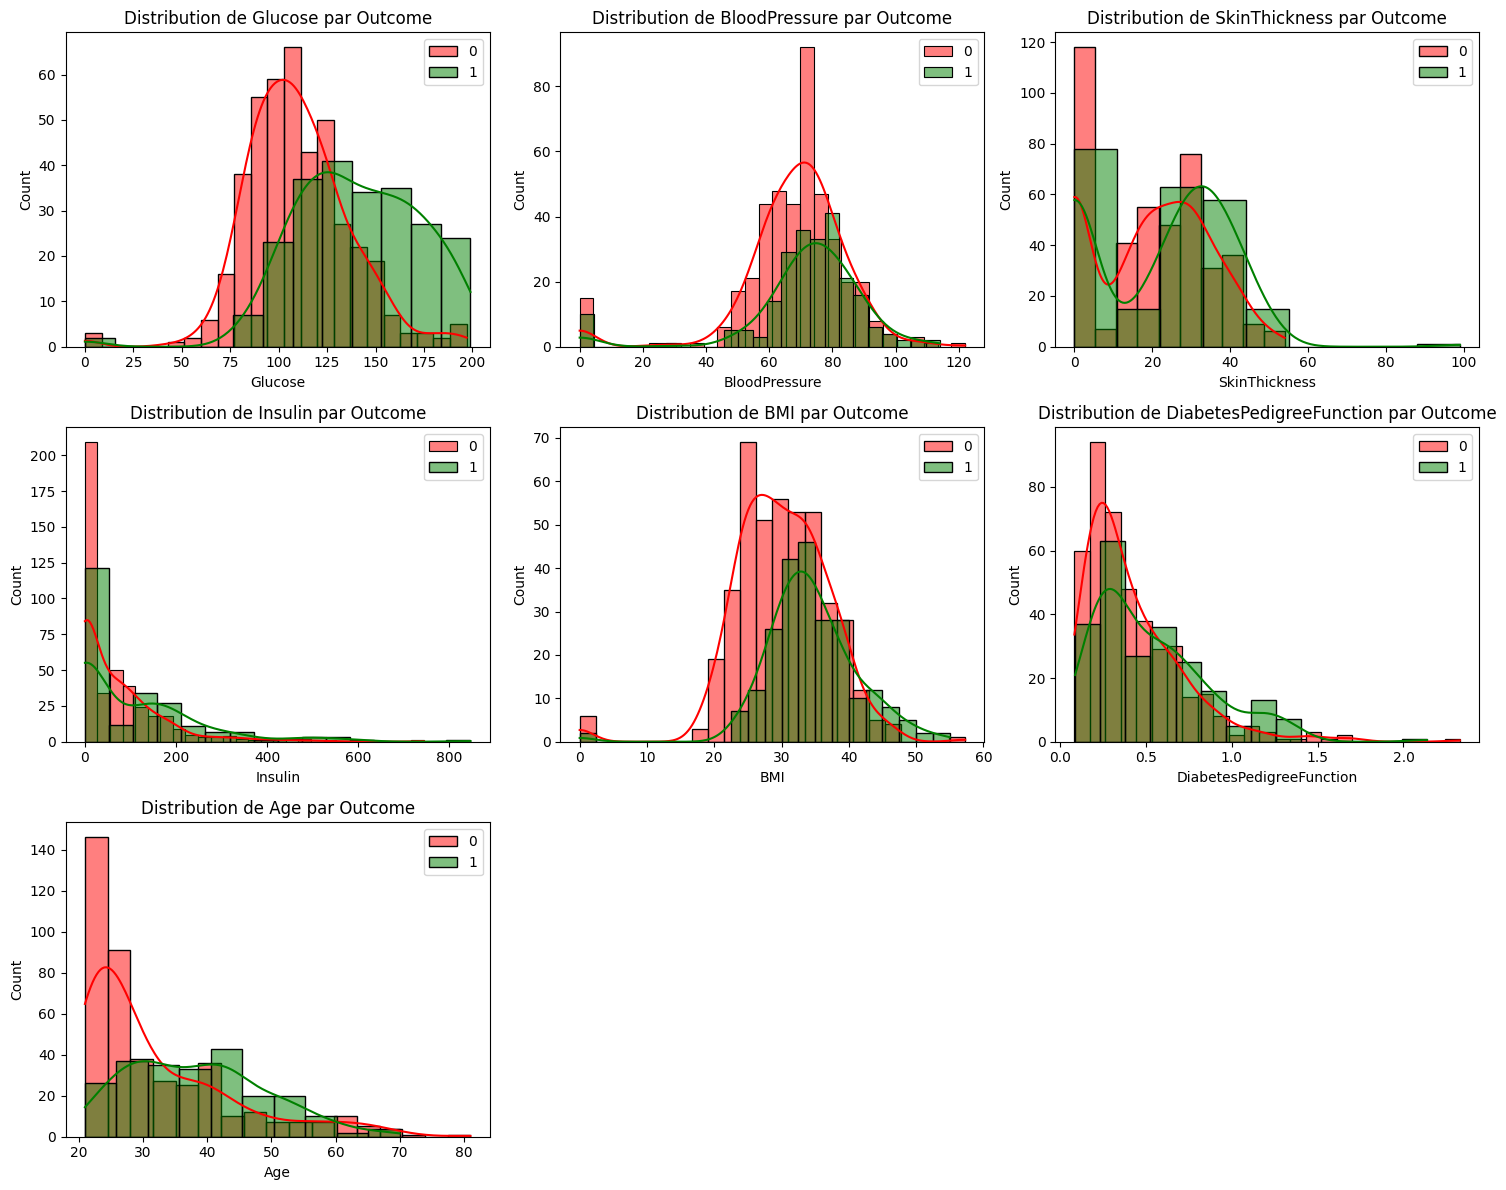

In [79]:
features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axs = axs.flatten()


# Boucle pour tracer les memes histogrammes que precedement mais que sur les personnes ayant eu au moins un enfant

for i, feature in enumerate(features):
    # Filtrer les données pour Outcome == 0 et Pregnancy >= 1
    data_filt_preg1_0 = data[(data['Outcome'] == 0) & (data['Pregnancies'] >= 1)][feature]
    # Filtrer les données pour Outcome == 1 et Pregnancy >= 1
    data_filt_preg1_1 = data[(data['Outcome'] == 1) & (data['Pregnancies'] >= 1)][feature]
    
    # Tracer les distributions pour Outcome == 0
    sns.histplot(data=data_filt_preg1_0, color='red', kde=True, ax=axs[i], label='0')
    # Tracer les distributions pour Outcome == 1
    sns.histplot(data=data_filt_preg1_1, color='green', kde=True, ax=axs[i], label='1')
    
    axs[i].set_title(f'Distribution de {feature} par Outcome')
    axs[i].legend()

# Masquer les sous-graphiques inutilisés
for j in range(len(features), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


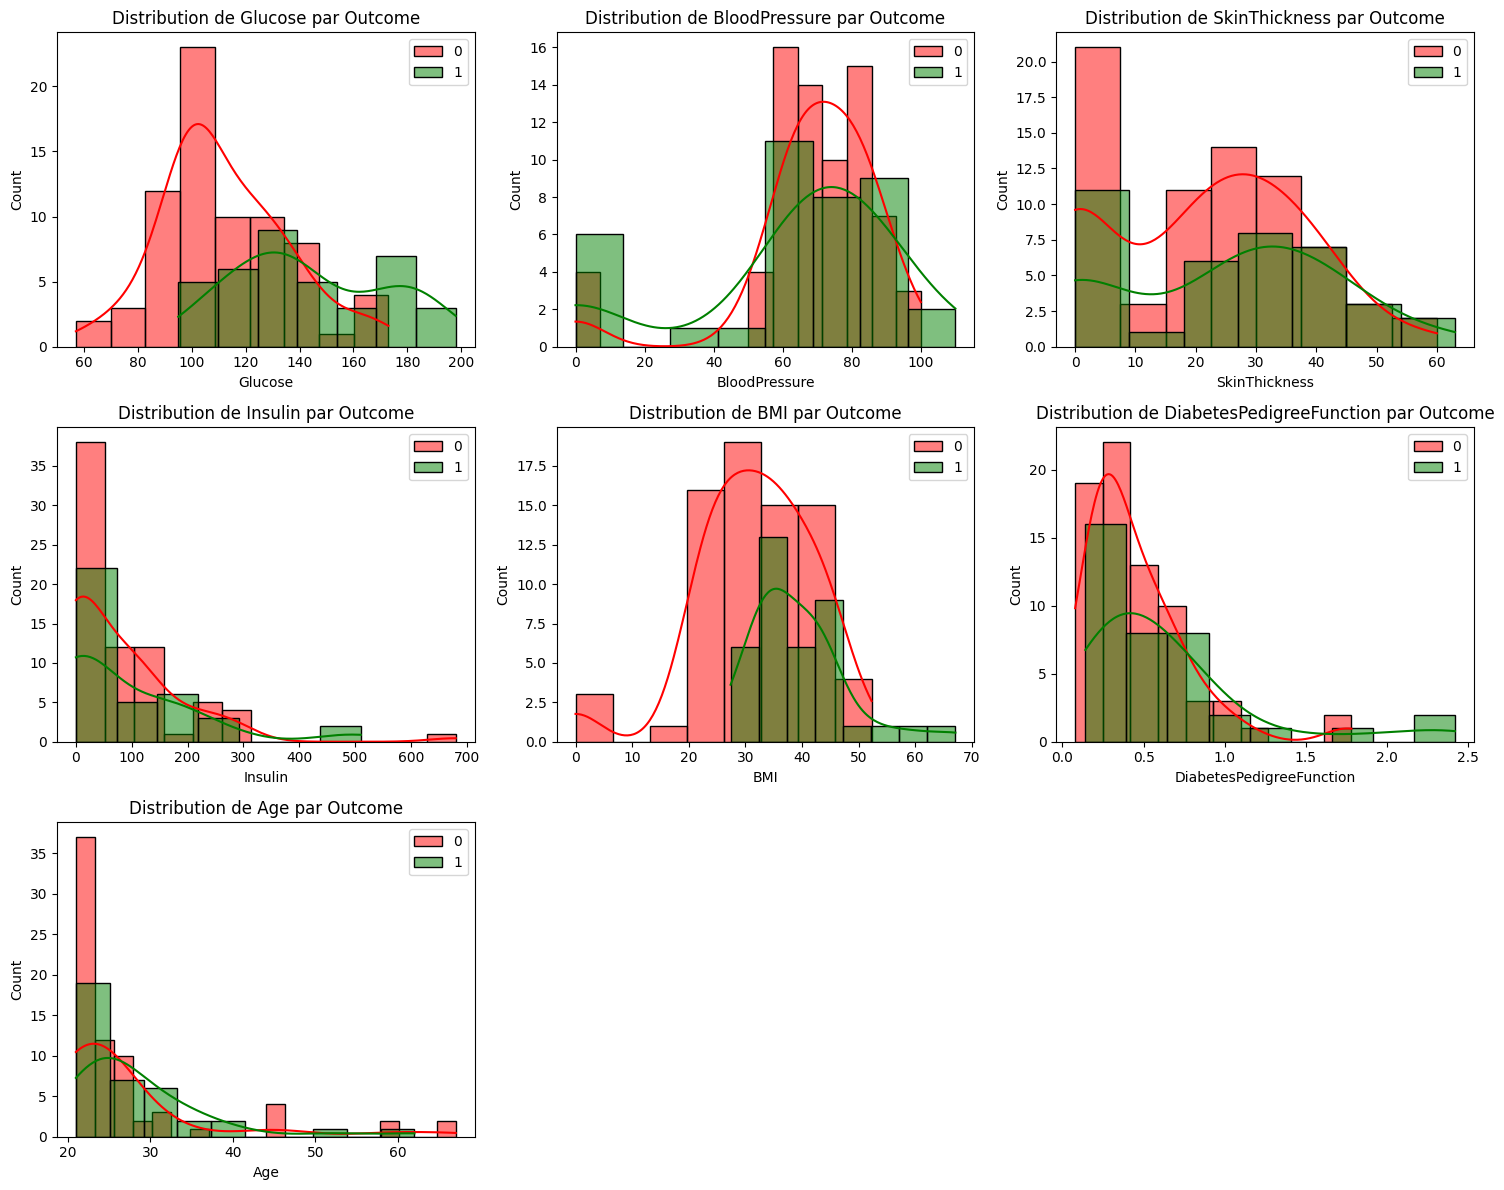

In [78]:
features = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axs = axs.flatten()


# Boucle pour tracer les memes histogrammes que precedement mais que sur les personnes n'ayant pas eu d'enfant

for i, feature in enumerate(features):
    # Filtrer les données pour Outcome == 0 et Pregnancy >= 1
    data_filt_preg0_0 = data[(data['Outcome'] == 0) & (data['Pregnancies'] == 0)][feature]
    # Filtrer les données pour Outcome == 1 et Pregnancy >= 1
    data_filt_preg0_1 = data[(data['Outcome'] == 1) & (data['Pregnancies'] == 0)][feature]
    
    # Tracer les distributions pour Outcome == 0
    sns.histplot(data=data_filt_preg0_0, color='red', kde=True, ax=axs[i], label='0')
    # Tracer les distributions pour Outcome == 1
    sns.histplot(data=data_filt_preg0_1, color='green', kde=True, ax=axs[i], label='1')
    
    axs[i].set_title(f'Distribution de {feature} par Outcome')
    axs[i].legend()

# Masquer les sous-graphiques inutilisés
for j in range(len(features), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()


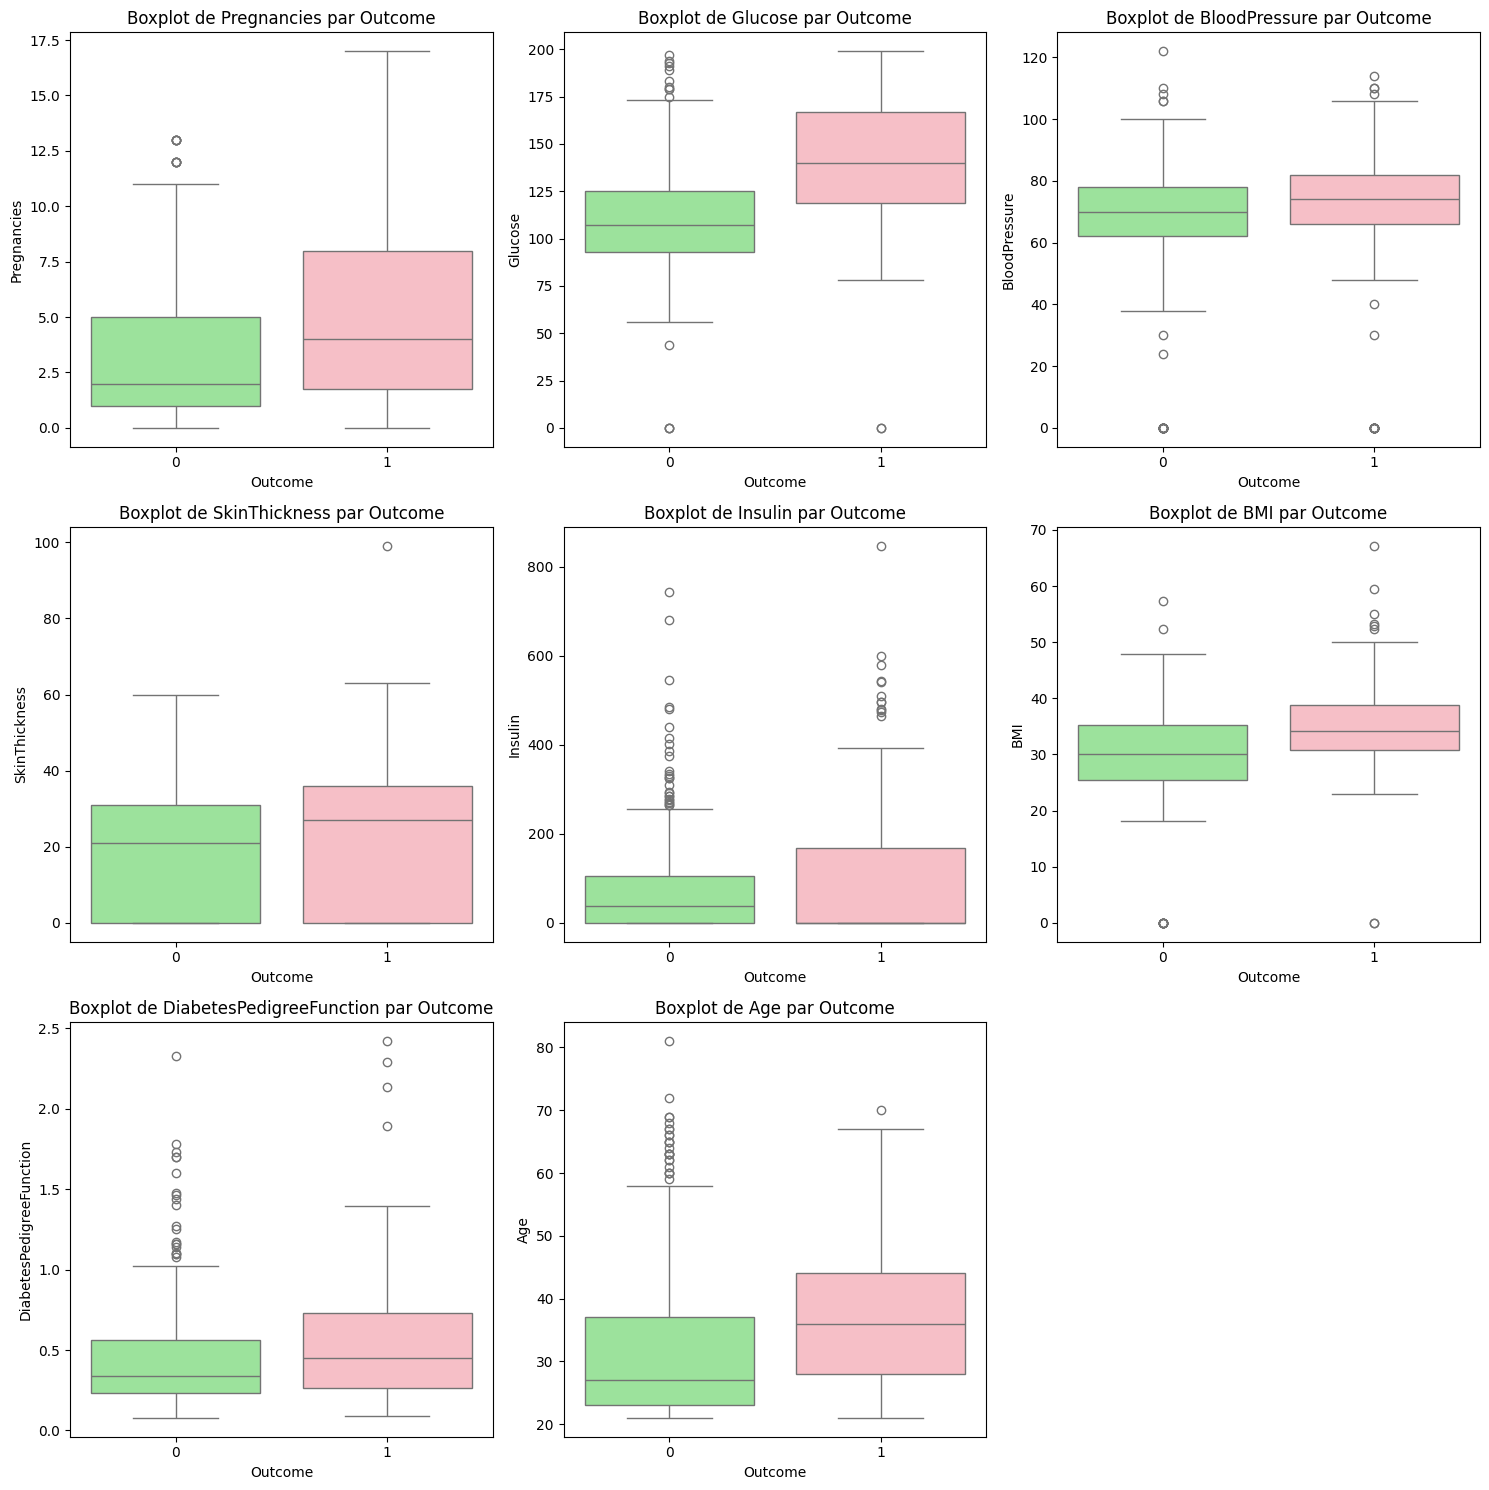

In [67]:
# Liste des caractéristiques à tracer
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Créer des sous-graphiques
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Aplatir la liste des axes pour itérer plus facilement
axs = axs.flatten()

# Parcourir chaque caractéristique et tracer les boîtes à moustaches
for i, feature in enumerate(features):
    sns.boxplot(x='Outcome', y=feature, data=data, hue='Outcome', palette=['lightgreen', 'lightpink'], ax=axs[i], legend=False)
    axs[i].set_title(f'Boxplot de {feature} par Outcome')

# Masquer les sous-graphiques inutilisés
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()
plt.show()

In [ ]:
''' Hormis skintickness pas de valeurs extremes non explicables hors 0'''

In [ ]:
''' Les boxplots nous permettent de voir que des valeurs sortent de l'ordinaires dans certaines lignes
    Nous allons devoir explorer ces données afin de determiner si elles sont due à la maladie ou si 
    elles sont des valeurs abérrantes à modifier ou supprimer'''

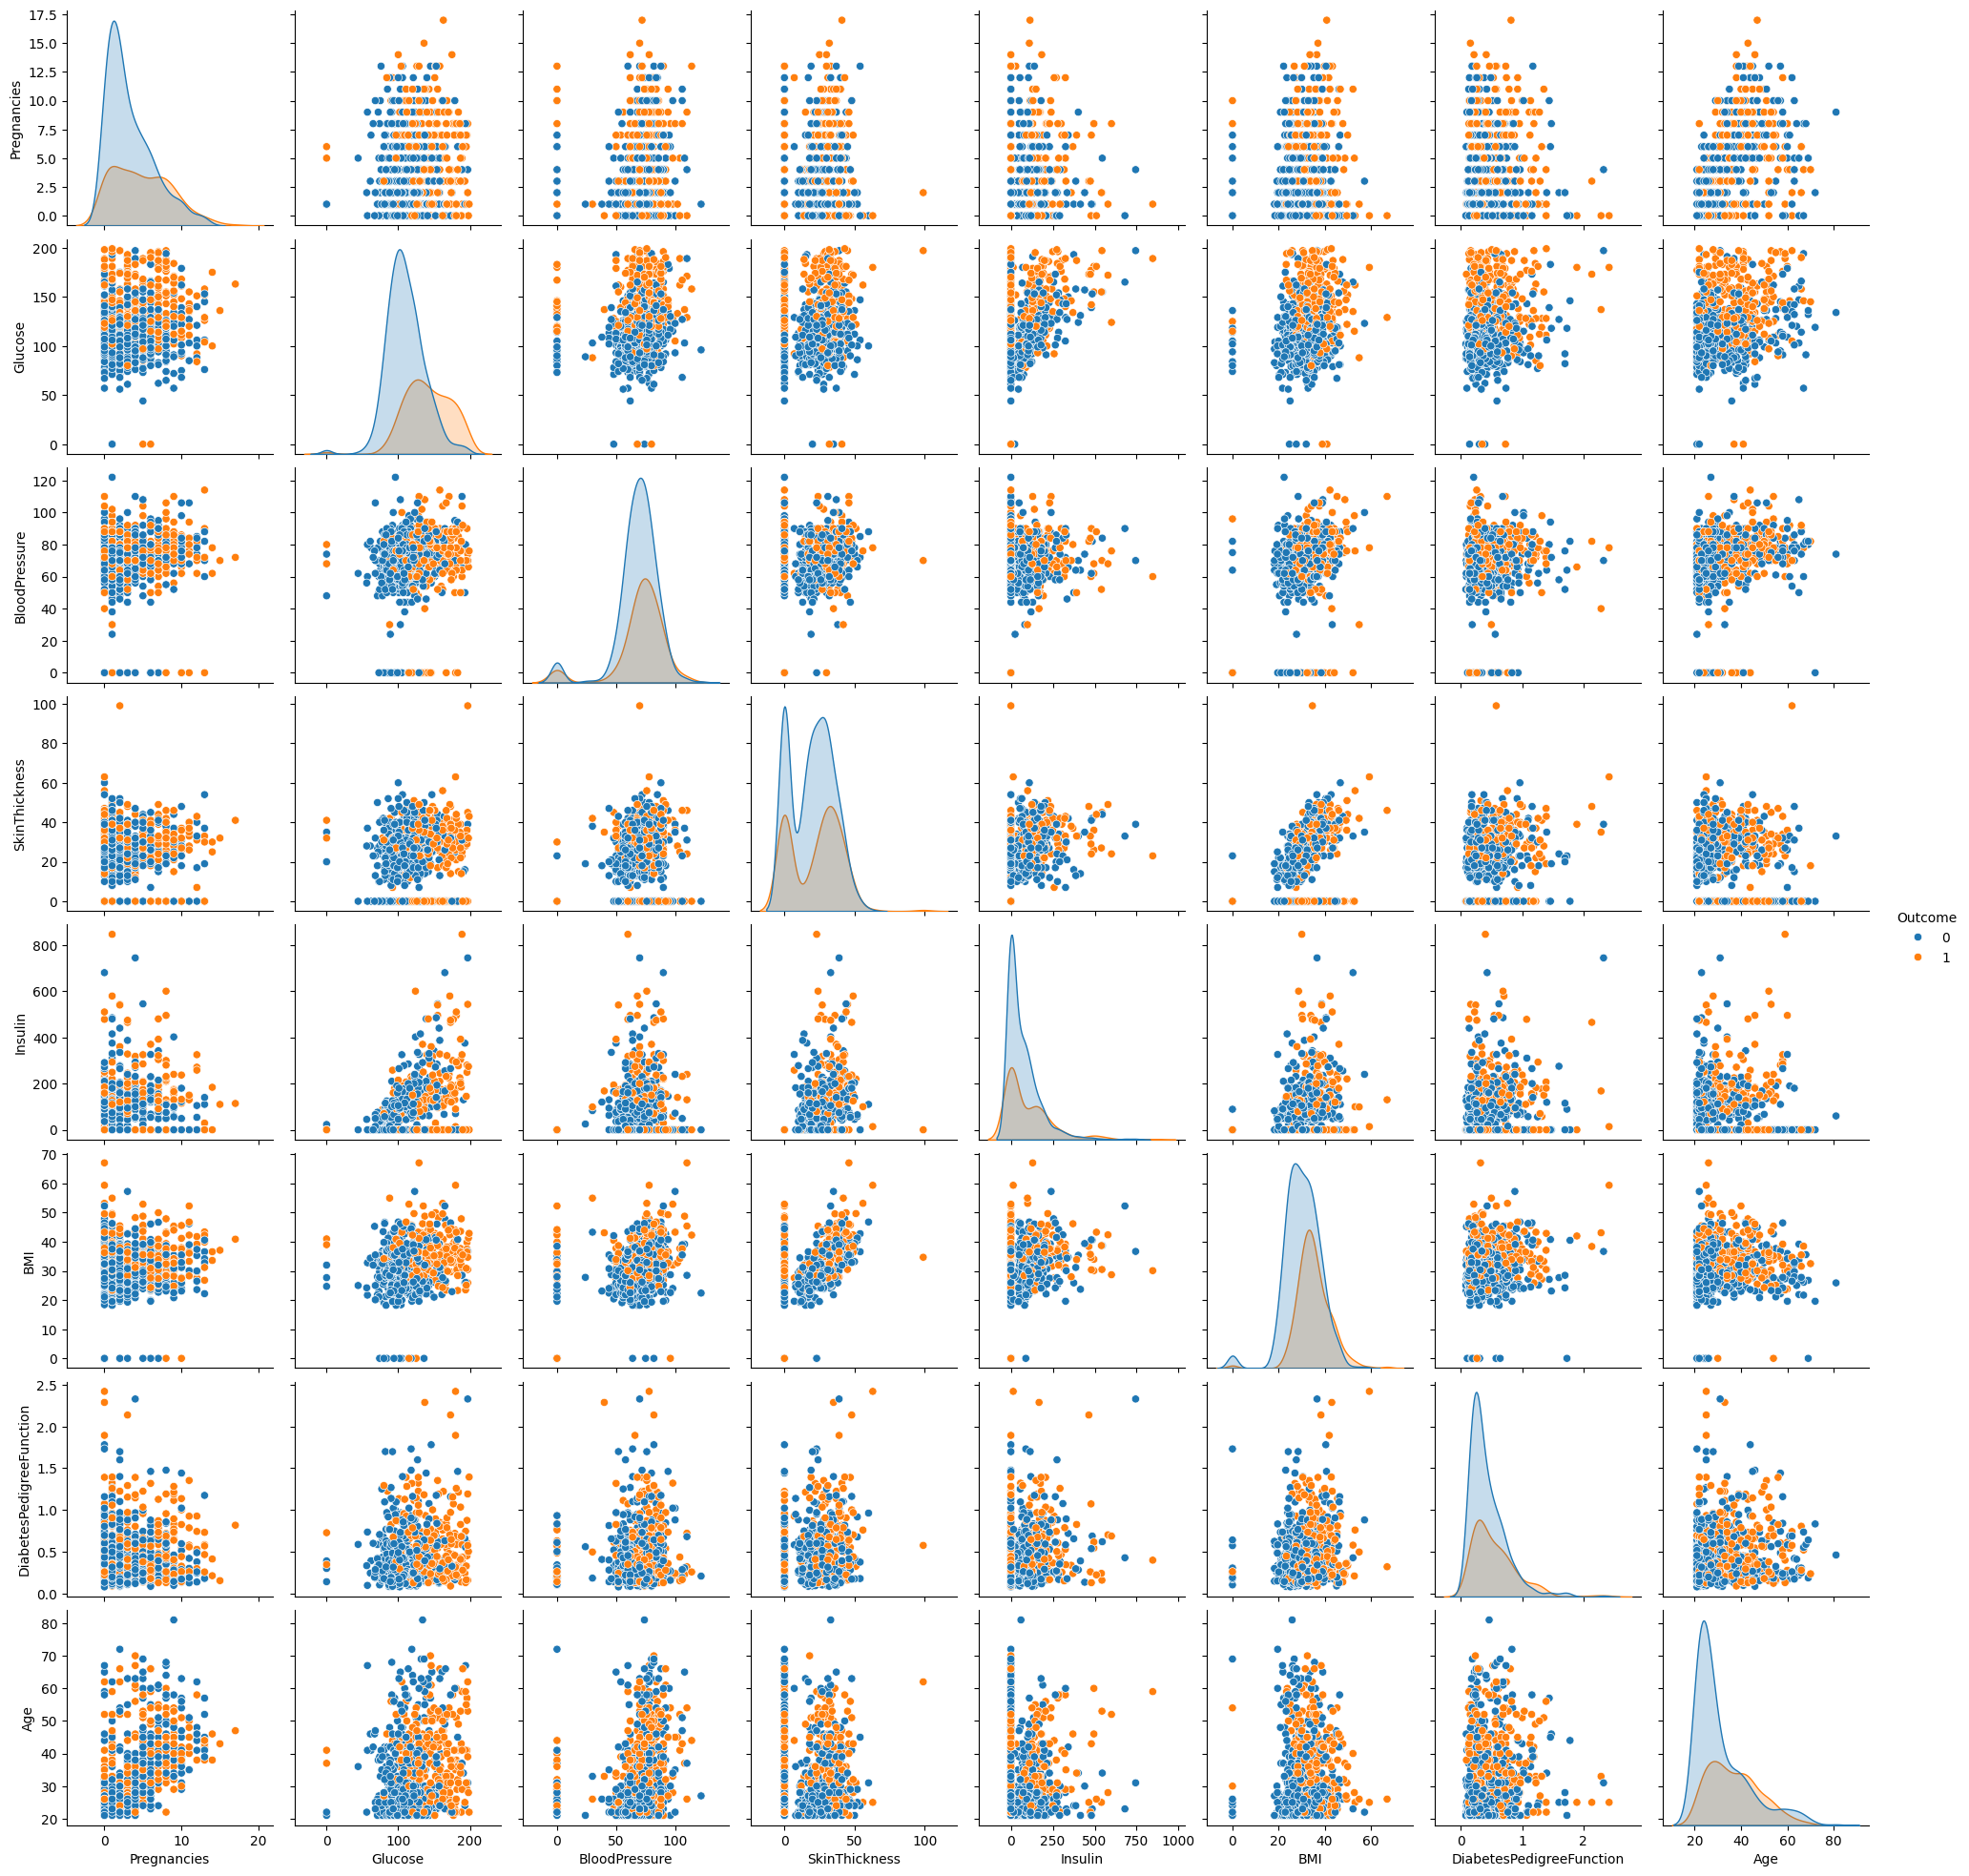

In [80]:
sns.pairplot(data,hue="Outcome")
plt.show()

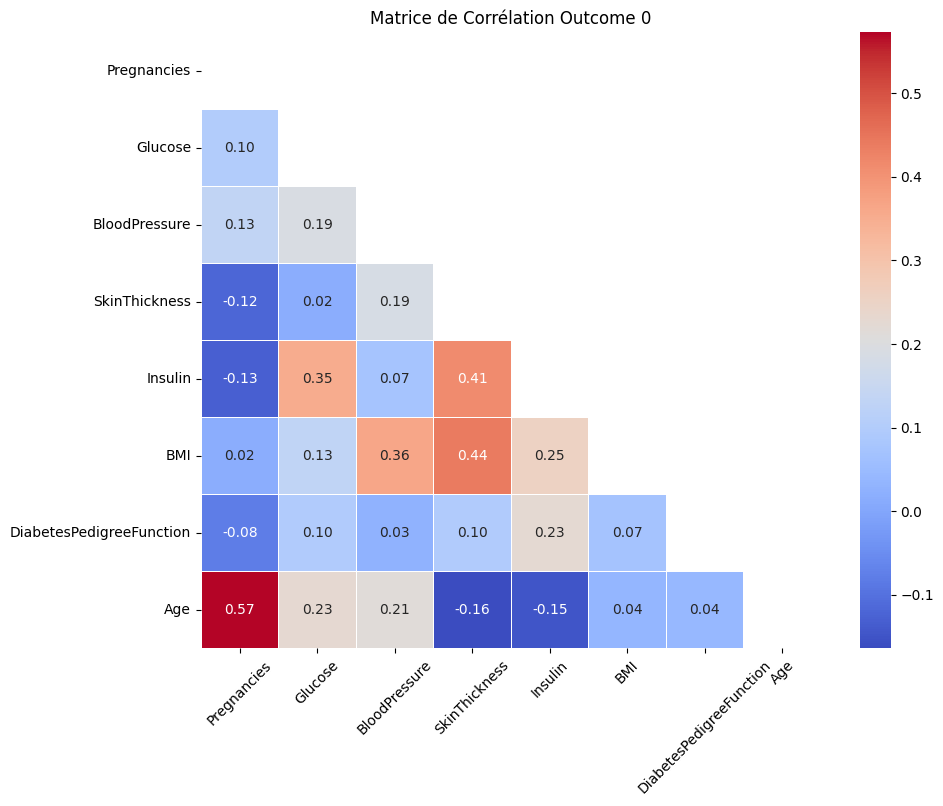

In [69]:
# Calculer la matrice de corrélation
correlation_matrix_0 = data_outcome_0.drop(columns = "Outcome").corr()

# Créer un masque pour masquer la partie inférieure de la matrice de corrélation
mask = np.triu(np.ones_like(correlation_matrix_0, dtype=bool))

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_0, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Matrice de Corrélation Outcome 0')
plt.xticks(rotation=45)
plt.show()

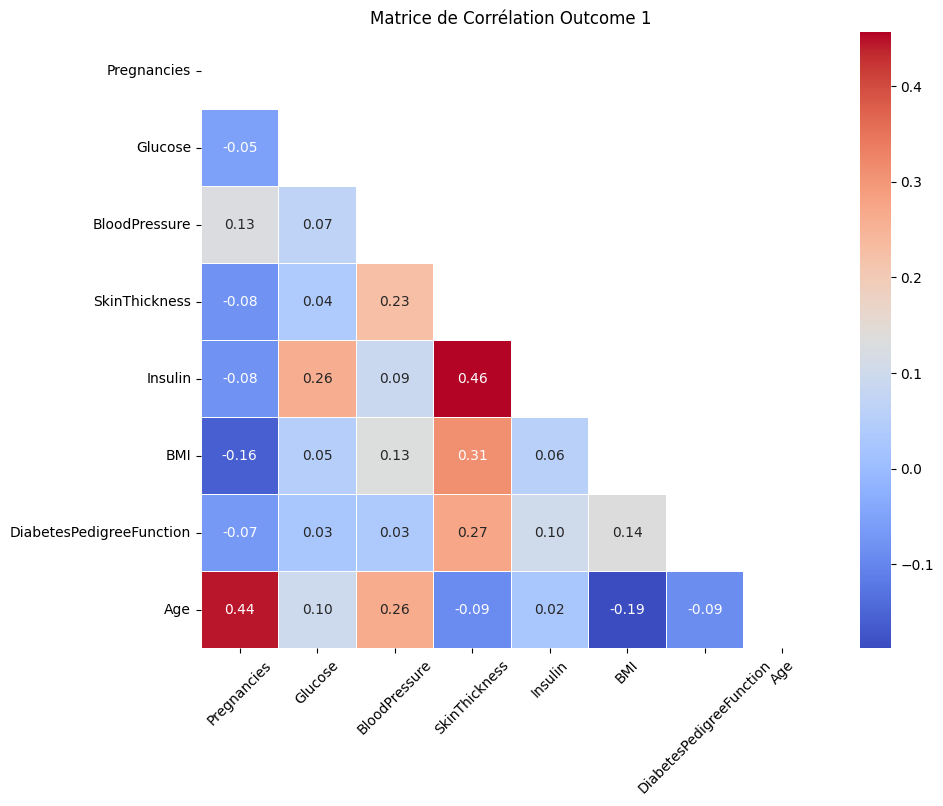

In [70]:
# Calculer la matrice de corrélation
correlation_matrix_1 = data_outcome_1.drop(columns = "Outcome").corr()

# Créer un masque pour masquer la partie inférieure de la matrice de corrélation
mask = np.triu(np.ones_like(correlation_matrix_1, dtype=bool))

# Visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.xticks(rotation=45)
plt.title('Matrice de Corrélation Outcome 1')
plt.show()

#### 1.2.2 - Analyse statique descriptive de base

In [71]:
# Initialisation d'une liste pour stocker les résultats
kruskal_results = []

# Boucle sur chaque colonne numérique (à l'exception de `Outcome`)
for col in data.columns[:-1]:  # On exclut la dernière colonne `Outcome`
    result = pg.kruskal(data=data, dv=col, between='Outcome')
    kruskal_results.append(result)

# Affichage des résultats
for i, result in enumerate(kruskal_results):
    print(f"Résultats pour la colonne '{data.columns[i]}':")
    print(result)
    print()


Résultats pour la colonne 'Pregnancies':
          Source  ddof1          H         p-unc
Kruskal  Outcome      1  30.279027  3.741498e-08

Résultats pour la colonne 'Glucose':
          Source  ddof1           H         p-unc
Kruskal  Outcome      1  173.620493  1.198015e-39

Résultats pour la colonne 'BloodPressure':
          Source  ddof1          H     p-unc
Kruskal  Outcome      1  15.666987  0.000076

Résultats pour la colonne 'SkinThickness':
          Source  ddof1         H     p-unc
Kruskal  Outcome      1  6.175171  0.012956

Résultats pour la colonne 'Insulin':
          Source  ddof1         H     p-unc
Kruskal  Outcome      1  3.388974  0.065634

Résultats pour la colonne 'BMI':
          Source  ddof1         H         p-unc
Kruskal  Outcome      1  73.56931  9.716371e-18

Résultats pour la colonne 'DiabetesPedigreeFunction':
          Source  ddof1         H     p-unc
Kruskal  Outcome      1  23.58436  0.000001

Résultats pour la colonne 'Age':
          Source  ddof1 

In [72]:

# Calcul du test de Kruskal-Wallis
H, p_value = stats.kruskal(data_outcome_0,  data_outcome_1)

print("Statistique H de Kruskal-Wallis:", H)
print("p-value:", p_value)


Statistique H de Kruskal-Wallis: [ 30.279027   173.62049293  15.66698698   6.17517144   3.38897409
  73.56931035  23.5843598   73.25301342 767.        ]
p-value: [3.74149760e-008 1.19801482e-039 7.55311000e-005 1.29555357e-002
 6.56337748e-002 9.71637055e-018 1.19555332e-006 1.14050912e-017
 8.07317150e-169]


### 1.3 - Observation des variables catégoritielles

#### 1.3.1 - Analyse du nombre de valeurs unique

In [73]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

#### 1.3.2 - Analyse des  statistique de base

## 2 - Nettoyage des données

### 2.1 - Traitement des valeurs manquantes

### 2.2 - Traitement des doublons

### 2.3 - Traitement des valeurs abérantes

## 3 - Modélisation des données

In [74]:
''' Choisir une méthode de normalisation
    La méthode de normalisation que vous choisissez dépend de la distribution de vos données et de la présence de valeurs aberrantes. 
    La normalisation Min-Max est simple et efficace pour les données avec une distribution connue. La standardisation (Z-score) est 
    utile lorsque les données suivent une distribution normale. MaxAbsScaler et RobustScaler sont utiles lorsque les données contiennent des valeurs aberrantes.
'''


' Choisir une méthode de normalisation\n    La méthode de normalisation que vous choisissez dépend de la distribution de vos données et de la présence de valeurs aberrantes. \n    La normalisation Min-Max est simple et efficace pour les données avec une distribution connue. La standardisation (Z-score) est \n    utile lorsque les données suivent une distribution normale. MaxAbsScaler et RobustScaler sont utiles lorsque les données contiennent des valeurs aberrantes.\n'

In [75]:
# Appliquer la normalisation RobustScaler
scaler = RobustScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

NameError: name 'df' is not defined

In [ ]:
# Appliquer la normalisation Z-score
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
# Appliquer la normalisation Min-Max
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
# Appliquer la normalisation Max Abs
scaler = MaxAbsScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)